In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import sklearn
from sklearn import linear_model

In [45]:
df = pd.read_csv("pastry_inventory.csv")
df

,sales_outlet_id,transaction_date,product_id,start_of_day,quantity_sold,waste,% waste
0,3,4/1/2019,69,18,8,10,56%
1,3,4/1/2019,70,18,12,6,33%
2,3,4/1/2019,71,18,8,10,56%
3,3,4/1/2019,72,48,9,39,81%
4,3,4/1/2019,73,18,9,9,50%
...,...,...,...,...,...,...,...
302,8,4/27/2019,69,18,1,17,94%
303,8,4/27/2019,70,18,4,14,78%
304,8,4/27/2019,71,18,2,16,89%
305,8,4/27/2019,72,48,19,29,60%


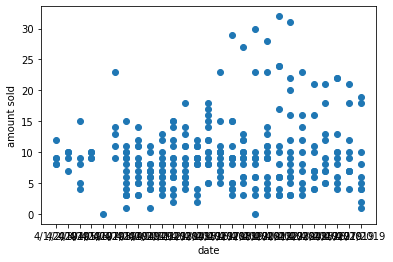

In [46]:
%matplotlib inline
plt.xlabel('date')
plt.ylabel('amount sold')
plt.scatter(df.transaction_date,df.quantity_sold)

In [54]:
#I want one week sunday - monday with one product id, to show the amount sold
df["transaction_weekday"] = pd.to_datetime(df['transaction_date'], format = '%m/%d/%Y').dt.dayofweek

df["transaction_day"] = pd.to_datetime(df['transaction_date'], format = '%m/%d/%Y').dt.day_name()
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df.head()


,sales_outlet_id,transaction_date,product_id,start_of_day,quantity_sold,waste,% waste,transaction_weekday,transaction_day
0,3,2019-04-01,69,18,8,10,56%,0,Monday
1,3,2019-04-01,70,18,12,6,33%,0,Monday
2,3,2019-04-01,71,18,8,10,56%,0,Monday
3,3,2019-04-01,72,48,9,39,81%,0,Monday
4,3,2019-04-01,73,18,9,9,50%,0,Monday


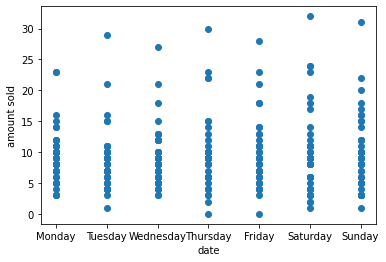

In [48]:
%matplotlib inline
plt.xlabel('date')
plt.ylabel('amount sold')
plt.scatter(df.transaction_day,df.quantity_sold)

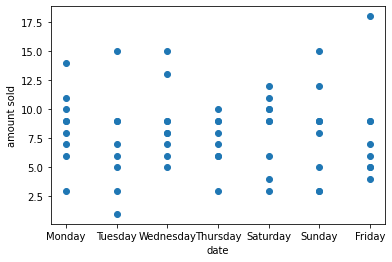

In [49]:
#isolate product 73 Almond Croissant
dfproduct73 = df[df['product_id'] == 73] 
dfproduct73

%matplotlib inline
plt.xlabel('date')
plt.ylabel('amount sold')
plt.scatter(dfproduct73.transaction_day,dfproduct73.quantity_sold)

In [50]:
#trying to make sense of the data
test = df[df['product_id'] == 73]
test = test.drop(['sales_outlet_id','% waste', 'product_id'],axis=1)
test

,transaction_date,start_of_day,quantity_sold,waste,transaction_weekday,transaction_day
4,4/1/2019,18,9,9,0,Monday
9,4/2/2019,18,9,9,1,Tuesday
14,4/3/2019,18,15,3,2,Wednesday
19,4/4/2019,18,9,9,3,Thursday
25,4/6/2019,18,9,9,5,Saturday
30,4/7/2019,18,3,15,6,Sunday
35,4/8/2019,18,6,12,0,Monday
44,4/10/2019,18,6,12,2,Wednesday
49,4/11/2019,18,3,15,3,Thursday
54,4/12/2019,18,6,12,4,Friday


In [62]:
#I want one week sunday - monday with one product id, to show the amount sold

start_date = '2019-04-01'
end_date = '2019-04-08'

df[df.transaction_date.between(start_date, end_date)]
df

,sales_outlet_id,transaction_date,product_id,start_of_day,quantity_sold,waste,% waste,transaction_weekday,transaction_day
0,3,2019-04-01,69,18,8,10,56%,0,Monday
1,3,2019-04-01,70,18,12,6,33%,0,Monday
2,3,2019-04-01,71,18,8,10,56%,0,Monday
3,3,2019-04-01,72,48,9,39,81%,0,Monday
4,3,2019-04-01,73,18,9,9,50%,0,Monday
...,...,...,...,...,...,...,...,...,...
302,8,2019-04-27,69,18,1,17,94%,5,Saturday
303,8,2019-04-27,70,18,4,14,78%,5,Saturday
304,8,2019-04-27,71,18,2,16,89%,5,Saturday
305,8,2019-04-27,72,48,19,29,60%,5,Saturday


In [73]:
#show only product 73 for a period of one week

start_date = pd.to_datetime('2019-04-01')
end_date = pd.to_datetime('2019-04-08')

df_pr73_w1 = df.loc[(df['transaction_date'] >= start_date) & (df['transaction_date'] < end_date)]

df_pr73_w1 = df_pr73_w1[df_pr73_w1['product_id'] == 73]
df_pr73_w1

,sales_outlet_id,transaction_date,product_id,start_of_day,quantity_sold,waste,% waste,transaction_weekday,transaction_day
4,3,2019-04-01,73,18,9,9,50%,0,Monday
9,3,2019-04-02,73,18,9,9,50%,1,Tuesday
14,3,2019-04-03,73,18,15,3,17%,2,Wednesday
19,3,2019-04-04,73,18,9,9,50%,3,Thursday
25,3,2019-04-06,73,18,9,9,50%,5,Saturday
30,3,2019-04-07,73,18,3,15,83%,6,Sunday
101,5,2019-04-07,73,18,5,13,72%,6,Sunday
206,8,2019-04-07,73,18,9,9,50%,6,Sunday


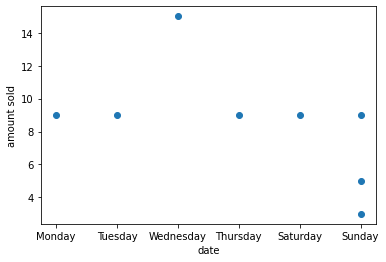

In [74]:
%matplotlib inline
plt.xlabel('date')
plt.ylabel('amount sold')
plt.scatter(df_pr73_w1.transaction_day,df_pr73_w1.quantity_sold)